
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis

1. What is the effect of kind of the disease on the person not showing up?
2. What is the effect of whether the person is handicapped or not, on not showing up? 
3. What is the effect of age on the person not showing up? 
4. What is the effect of having a scholarship or not, on the person not showing up?
5. What is the effect of receiving an SMS on the person not showing up?



In [71]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.1MB/s eta 0:00:01 1% |▌                               | 153kB 9.0MB/s eta 0:00:02    69% |██████████████████████          | 7.2MB 26.0MB/s eta 0:00:01    92% |█████████████████████████████▍  | 9.6MB 23.7MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.0MB/s eta 0:00:01  1% |▌                               | 215kB 16.4MB/s eta 0:00:01    56% |██████████████████▏             | 7.6MB 21.9MB/s eta 0:00:01    64% |████████████████████▊           | 8.7MB 22.5MB/s eta 0:00:01    81% |██████████████████████████      | 10.9MB 22.5MB/s eta 0:00:01    89% |████████████████████████████▋   | 12.0MB 23.1MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstall

<a id='wrangling'></a>
## Data Wrangling


In [72]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [74]:
# Checking for duplicates
df.duplicated().sum()


0

In [75]:
# Chicking for missing values
df.isnull().sum().sum()


0


### Data Cleaning


In [76]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Drop the below columns as they are not relevant to the analysis questions
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood'], inplace=True, axis=1)

In [77]:
# Convert columns labels to lowercase
for col in df.columns:
    df = df.rename(columns={col: col.lower()})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
gender          110527 non-null object
age             110527 non-null int64
scholarship     110527 non-null int64
hipertension    110527 non-null int64
diabetes        110527 non-null int64
alcoholism      110527 non-null int64
handcap         110527 non-null int64
sms_received    110527 non-null int64
no-show         110527 non-null object
dtypes: int64(7), object(2)
memory usage: 7.6+ MB


In [78]:
# We are creating a column for patients with other diseases that didn't show up in our dataset. 
others = []
for i in range(110527):
    if df.hipertension[i] == df.diabetes[i] == df.alcoholism[i] == 0:
        others.append(1)
    else:
        others.append(0)


In [79]:
df['others'] = others

In [80]:
# check the correctness of the new column. o/p should be True.
df.query('hipertension == 0 & diabetes == 0 & alcoholism == 0')['age'].count() == df.query('others == 1')['age'].count()

True

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
gender          110527 non-null object
age             110527 non-null int64
scholarship     110527 non-null int64
hipertension    110527 non-null int64
diabetes        110527 non-null int64
alcoholism      110527 non-null int64
handcap         110527 non-null int64
sms_received    110527 non-null int64
no-show         110527 non-null object
others          110527 non-null int64
dtypes: int64(8), object(2)
memory usage: 8.4+ MB


In [82]:
# changing the column name
df.rename(columns={'no-show': 'no_show'}, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis



In [83]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,others
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.771866
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.419632
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


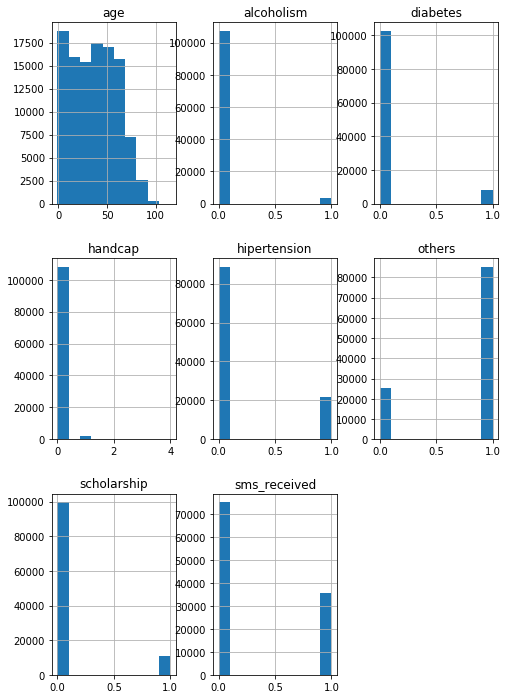

In [84]:
df.hist(figsize=(8,12));

In [85]:
df.no_show.value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In [86]:
# Calculating the nember of patients who showed up to all patients
showing_percentage = 88208/110527
print(showing_percentage)

0.798067440534892


# 1. What is the effect of kind of the disease on the person not showing up?


In [87]:
def plotting(x):
    
    """" 
    Takes a string as an input(column label),
    visualize it, and prints out the proportion of patients with a specific condition and showed up
    to those who did not.
    """
    # Visualization
    counts = df.groupby('no_show')[x].value_counts()
    counts.plot(kind='bar', alpha=0.7,title='Counts by patients with {condition} and no show'.format(condition=x));
    plt.xlabel('{condition} and No show'.format(condition=x.capitalize()), fontsize=18)
    plt.ylabel('Count', fontsize=18)
    
    # All patients with disease x
    all_df = df[df[x] == 1]
    
    all_count = all_df['age'].count()
    
    # Number of patients with disease x and showed up
    showed_count = all_df[all_df['no_show'] == 'No']['age'].count()
    
    print(showed_count/all_count)

0.819967266776


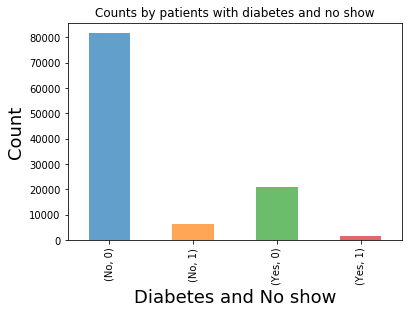

In [88]:
# Patients with diabetes that actually showed up and those who didn't

plotting('diabetes')

More than 80% of patients with diabetes show up

0.826980413742


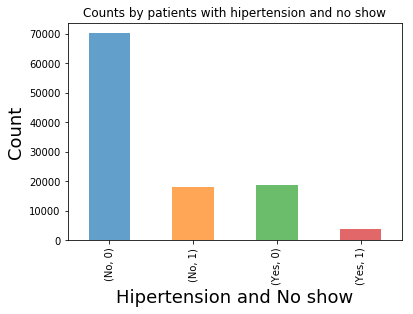

In [89]:
# Patients with hipertension that actually showed up and those who didn't

plotting('hipertension')

More than 82% of patients with hipertension show up


0.798511904762


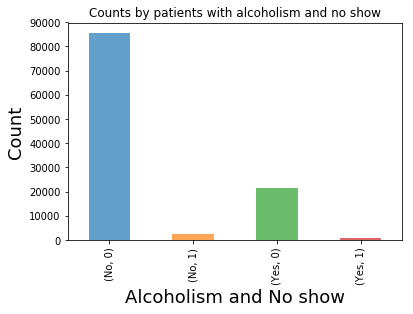

In [90]:
# Patients with alcoholism that actually showed up and those who didn't

plotting('alcoholism')

More than 79% of patients with alcoholism show up


0.790908664666


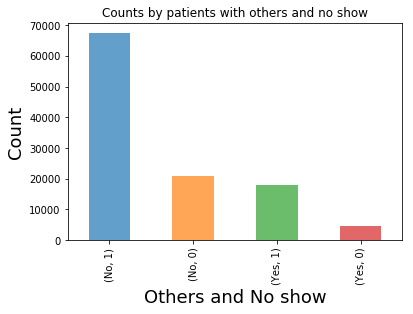

In [91]:
# The average of patients with other diseases that actually showed up and those who didn't

plotting('others')


More than 79% of patients with other diseases show up

# 2. What is the effect of age on the person not showing up? 


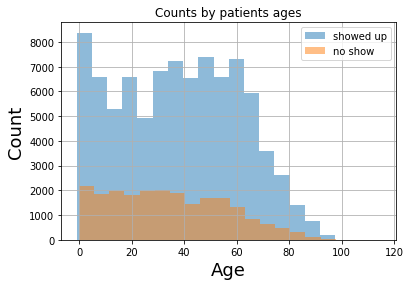

In [92]:
# Creating a mask for patients that showed up and for those who didn't.
showed_up = df.no_show == 'No'
no_show = df.no_show == 'Yes'

# The ages of patients that actually showed up and those who didn't

df.age[showed_up].hist(alpha=0.5, bins=20, label='showed up')
df.age[no_show].hist(alpha=0.5, bins=20, label='no show')
plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Counts by patients ages')
plt.legend();

Enfants and patients age from 30 to 65 are most likely to show up.

# 3. What is the effect of having a scholarship or not, on the person not showing up?


0.762636957923


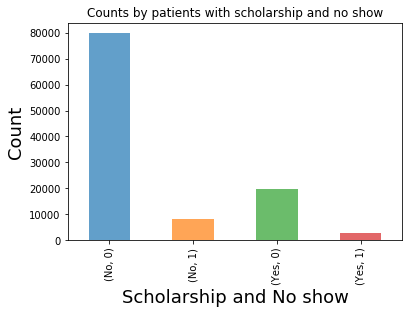

In [93]:
# Patients with scholarship that actually showed up and those who didn't

plotting('scholarship')


More than 76% of patients with scholarships show up


# 4. What is the effect of receiving an SMS on the person not showing up?


0.724254551604


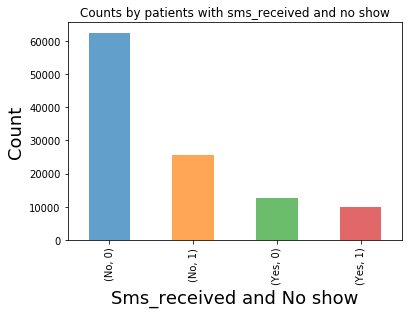

In [94]:
# Patients that received an SMS and actually showed up and those who didn't

plotting('sms_received')


More than 72% of patients that received an SMS show up


<a id='conclusions'></a>
## Conclusions

    Results:
      
      1. More than 79% of total patients show up for their appointments, this is reflected in our analysis.
      2. The possibility of a patient showing up based on their disease ranges from 79 to 82 percent.
      3. Enfants is the most likely to show up.
      4. Almost a quarter of the number of patients with scholarships did not show up.
      5. SMS doesn't seem to be significant,
         as almost 30% of patients who received SMS messages did not show up.

    Limitations:
    
        1. This is what we have at the moment, we may check, if the number of days before the appointment might
           affect the number of patients that show up, in further research.
        2. We used descriptive statistics to share our findings,
           but couldn't make any speculation on the future, as it requires inferential statistics.


In [95]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0